 # **Project Name**    -  **Online Retail Customer Segmentation**

##### **Project Type**    - Clustering
##### **Author**          - Raghul Kupendran Chetty


# **Problem Statement**


#### **Why Customer segmentation is needed ?**
Customer segmentation is important in retail because it allows companies to better understand the customers and their needs.
This information can then be used to create targeted marketing campaigns and improve the customer experience, along with that the results can also be used to deliver incremental sales, grow profitability and reduce customer attrition

# **Introduction**

We will use customer transactions data in order to divide customers into groups using RFM and K-means techniques.
Customer segmentation is necessary in order to understand customers behaviors.


### **Importing the required packages or dependencies**

In [ ]:
import pandas as pd
import numpy as np

import time, warnings
import datetime as dt

#modules for visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

#modules for building models
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")


### **Data Understanding**

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading Dataset
path = '/content/drive/MyDrive/Online Retail.xlsx'
retail_df = pd.read_excel(path)


In [ ]:
#checking the head of the dataset
retail_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#checking shape of our dataset
print("The shape of our dataset is: ", retail_df.shape)

The shape of our dataset is:  (541909, 8)


Let's explore our dataset first by getting more information about rows and columns.

In [ ]:
#checking the datatypes and non null count in each column
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Our dataset is composed of **541909 rows and 8 columns**.
There are some missing values in the CustomerID column, as it only has 406829 values. Also the column Description has missing values.

In [ ]:
#checking the summary statistics of dataset
retail_df.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


There are some negative values in UnitPrice and Quantity columns in our dataset. Maybe, this could mean that these quantity was returned or cancelled.

In [ ]:
#exploring the count of unique values in each column
print("Number of transactions: ", retail_df['InvoiceNo'].nunique())
print("Number of products bought: ",retail_df['StockCode'].nunique())
print("Number of customers:", retail_df['CustomerID'].nunique() )
print('Number of countries: ',retail_df['Country'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Number of countries:  38


Note: The number of NA customers is quite large and that would impact the results. Hence we will treat them

#### **Data Dictionary**

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
**Description:** Product (item) name. Nominal.
**Quantity:** The quantities of each product (item) per transaction. Numeric.
**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.
**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.
**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
**Country:** Country name. Nominal, the name of the country where each customer resides.


Now, let's have an idea about the quantitative data (Quantity & UnitPrice).

#### **Data Cleaning**

In [ ]:
# checking duplicate values in dataset
duplicates = retail_df[retail_df.duplicated()]
duplicates

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


There are **5268 duplicate records**. Lets exclude this records before proceeding with further analysis

In [ ]:
# Dropping duplicate records from dataset
retail_df.drop_duplicates(inplace = True)

In [ ]:
retail_df.shape

(536641, 8)

We have successfully removed duplicates from dataset

### **Missing Value Analysis and Treatment**

As we observed, we have missing values in columns Customers and Description

In [ ]:
# checking the percentage of missing values in both columns
print("Percentage of NA values in column customer ID : ", round(retail_df['CustomerID'].isnull().sum() * 100 / len(retail_df),2),"%" )
print("Percentage of NA values in column description :",round(retail_df["Description"].isnull().sum()*100 / len(retail_df),2),"%")

Percentage of NA values in column customer ID :  25.16 %
Percentage of NA values in column description : 0.27 %


We cannot impute the description column and also the percentage of NA values is very less. Hence dropping those records

In [ ]:
retail_df = retail_df[retail_df['Description'].notna()]
retail_df.shape

(535187, 8)

In [ ]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#creating a new dataframe which has only NA values based on Customer ID
retail_df_cust_na = retail_df[retail_df['CustomerID'].isna()]

In [ ]:
#creating a new dataframe which has valid Customer ID values
retail_df_cust = retail_df[retail_df['CustomerID'].notna()]

In [ ]:
retail_df_cust

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
retail_df_cust_na

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
#creating list of invoice no from the nan customer ID dataframe
invoice_cust_na = retail_df_cust_na["InvoiceNo"]

In [ ]:
# Checking whether there is a match in invoice no which has a valid customer ID for those invoice no which has NA customer ID
filtered_df = retail_df_cust[retail_df_cust["InvoiceNo"].isin(invoice_cust_na)]
filtered_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


There are is no matching invoice numbers which has valid customer ID and NA customer ID. Hence we can drop these records

In [ ]:
#keeping those records which has valid Customer ID
retail_df = retail_df[retail_df['CustomerID'].notna()]
retail_df.shape

(401604, 8)

In [ ]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


### **Outlier Analysis and Treatmet**

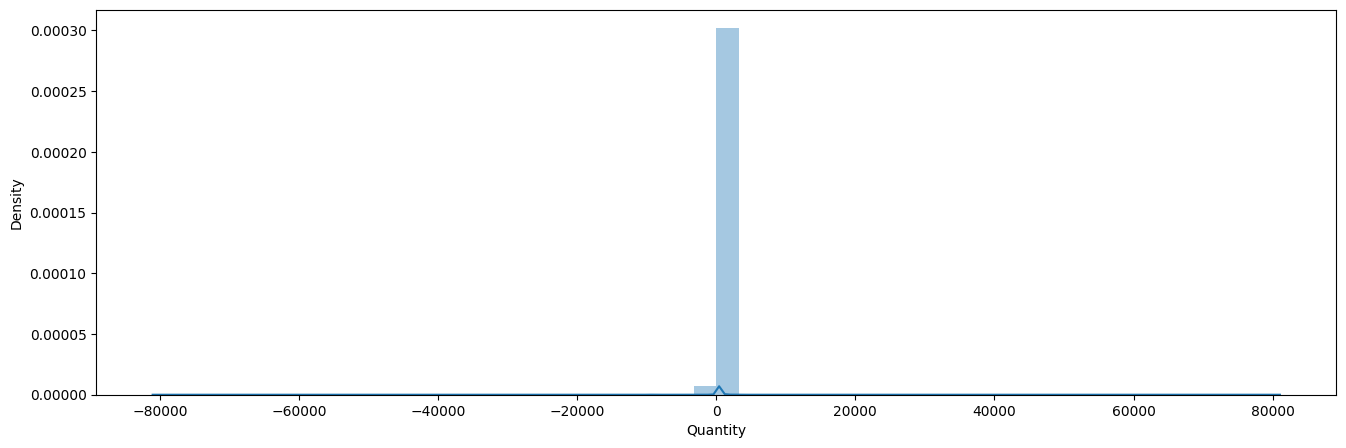

In [ ]:
# Checking the data distribution using quantity column
plt.figure(figsize = (16,5))
sns.distplot(retail_df["Quantity"])
plt.show()

<Axes: xlabel='Quantity'>

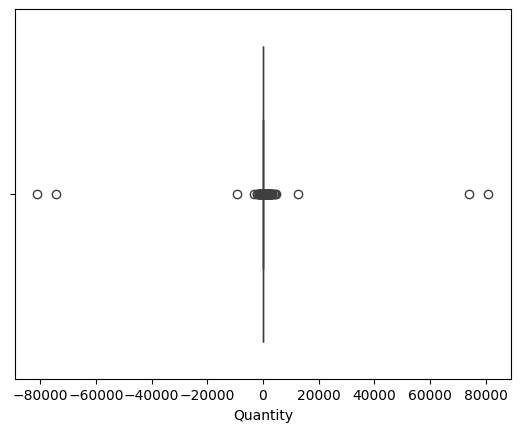

In [ ]:
sns.boxplot(x = retail_df["Quantity"])

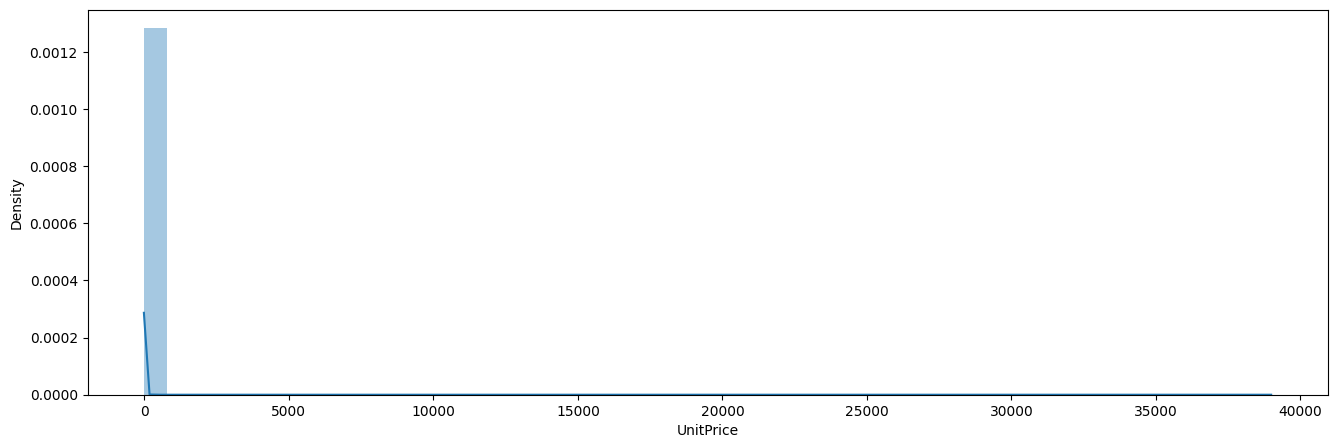

In [ ]:
# Checking the data distribution using quantity column
plt.figure(figsize = (16,5))
sns.distplot(retail_df["UnitPrice"])
plt.show()

<Axes: xlabel='UnitPrice'>

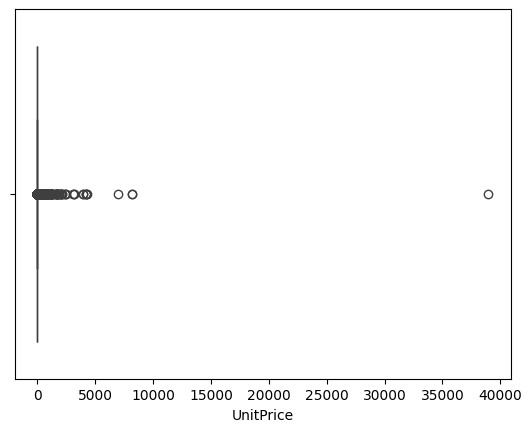

In [ ]:
sns.boxplot(x = retail_df["UnitPrice"])

Using Distibution and Box plot charts we can clearly see there are outliers in Quantity and Unitprice columns and it must be treated before proceeding with further analysis

In [ ]:
# calculating Q2 (median)
Q2 = retail_df["Quantity"].median()
print("Median of the data:", Q2)

#creating a function to detect outliers by calculating Q1, Q3 and outliers using IQR
def detect_outliers_boxplot(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  outliers = df[(df[column] < lower_bound) |(df[column] > upper_bound)]
  return outliers

outliers_boxplot = detect_outliers_boxplot(retail_df,"Quantity")

percentage_outliers = (len(outliers_boxplot) / len(retail_df)) *100
print("Percentage of Outliers in the data based on Quantity:", percentage_outliers)


Median of the data: 5.0
Percentage of Outliers in the data based on Quantity: 6.634894074760211


In [ ]:
#creating list of quantities which are outliers
outlier_qty = outliers_boxplot["Quantity"]

In [ ]:
#creating a new dataframe which has no outliers
outlier_filtered_df = retail_df[~retail_df["Quantity"].isin(outlier_qty)]
outlier_filtered_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Detected outliers IQR and found that 6% of data is outliers. Hence
removing outliers from our dataset since its less than 10% of data and also clustering algorithms like K-means is sensitive to outliers

In [ ]:
outlier_filtered_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,374958.000000,374958,374958.000000,374958.000000
mean,6.880915,2011-07-10 18:38:47.653817344,3.614262,15296.014255
min,-13.000000,2010-12-01 08:26:00,0.000000,12347.000000
25%,2.000000,2011-04-06 15:47:00,1.250000,13969.000000
50%,4.000000,2011-07-31 12:02:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:12:45,3.750000,16800.000000
max,27.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,6.776924,NaN,72.189462,1712.757792


We can see that there are negative values in Quantity column. Negative values indicate cancelled or return orders. We are going to consider only those records which has positive quantity values and hence will remove these records before proceeding with further analysis

In [ ]:
#creating a new dataframe which has negative quantities and will not be considered in our analysis
cancelled_orders = outlier_filtered_df[outlier_filtered_df['Quantity'] < 0]

In [ ]:
#creating a new dataframe which has positive quantities and will be considered in our analysis
valid_orders = outlier_filtered_df[outlier_filtered_df['Quantity'] > 0]

In [ ]:
#checking the percentage of cancelled orders in our dataset
# check how many rows our dataframe of cancelled orders contain
print("We have ",len(cancelled_orders), " cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = outlier_filtered_df['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

We have  7851  cancelled orders.
Percentage of orders canceled: 7851/20665 (37.99%) 


We have a large percentage of cancelled orders of 37%. Studying these cancelled orders may help in preventing future cancellation.

In [ ]:
# This dataframe is free from outliers and does not contain any negative values in Quantity column
valid_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### **Exploratory Data Analysis**

In [ ]:
#Creating new columns using Invoice Date column
valid_orders["Year"] =  valid_orders["InvoiceDate"].dt.year
valid_orders["Month"] =  valid_orders["InvoiceDate"].dt.month
valid_orders["Day"] =  valid_orders["InvoiceDate"].dt.day
valid_orders["Day_of_week"] =  valid_orders["InvoiceDate"].dt.day_name()

In [ ]:
#Creating new column "Revenue" which represents the purchase value of Invoice
valid_orders["Revenue"] = valid_orders["Quantity"]*valid_orders["UnitPrice"]

In [ ]:
#creating a copy of dataframe
retail_eda_df = valid_orders.copy()

In [ ]:
retail_eda_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month', 'Day',
       'Day_of_week', 'Revenue'],
      dtype='object')

**Which country contributes more revenue ?**

In [ ]:
top10_country = retail_eda_df.groupby("Country")["Revenue"].sum().sort_values(ascending = False).reset_index()
top10_country = top10_country[:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'France'),
  Text(3, 0, 'EIRE'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'Switzerland'),
  Text(6, 0, 'Belgium'),
  Text(7, 0, 'Netherlands'),
  Text(8, 0, 'Portugal'),
  Text(9, 0, 'Norway')])

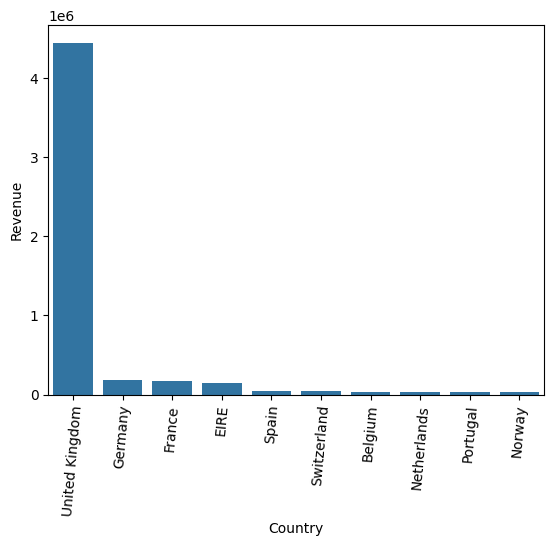

In [ ]:
sns.barplot(data = top10_country, x = top10_country["Country"], y = top10_country["Revenue"])
plt.xticks(rotation = 85)

**Which country has more customer base ?**

In [ ]:
top10_country = retail_eda_df.groupby("Country")["CustomerID"].sum().sort_values(ascending = False).reset_index()
top10_country = top10_country[:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'France'),
  Text(3, 0, 'EIRE'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'Belgium'),
  Text(6, 0, 'Switzerland'),
  Text(7, 0, 'Portugal'),
  Text(8, 0, 'Norway'),
  Text(9, 0, 'Netherlands')])

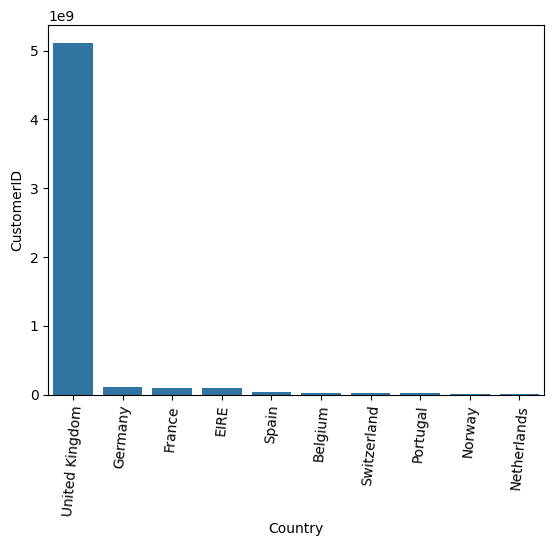

In [ ]:
sns.barplot(data = top10_country, x = top10_country["Country"], y = top10_country["CustomerID"])
plt.xticks(rotation = 85)

**Which product generates more revenue ?**

In [ ]:
top10_products = retail_eda_df.groupby("Description")["Revenue"].sum().sort_values(ascending = False).reset_index()
top10_products = top10_products[:10]

In [ ]:
top10_products

,Description,Revenue
0,REGENCY CAKESTAND 3 TIER,88073.20
1,POSTAGE,77803.96
2,Manual,50451.38
3,PARTY BUNTING,35082.33
4,WHITE HANGING HEART T-LIGHT HOLDER,31763.76
5,JUMBO BAG RED RETROSPOT,24923.50
6,SPOTTY BUNTING,23513.05
7,ASSORTED COLOUR BIRD ORNAMENT,22940.06
8,JAM MAKING SET WITH JARS,21394.24
9,DOORMAT KEEP CALM AND COME IN,21191.59


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(1, 0, 'POSTAGE'),
  Text(2, 0, 'Manual'),
  Text(3, 0, 'PARTY BUNTING'),
  Text(4, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(5, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(6, 0, 'SPOTTY BUNTING'),
  Text(7, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(8, 0, 'JAM MAKING SET WITH JARS'),
  Text(9, 0, 'DOORMAT KEEP CALM AND COME IN')])

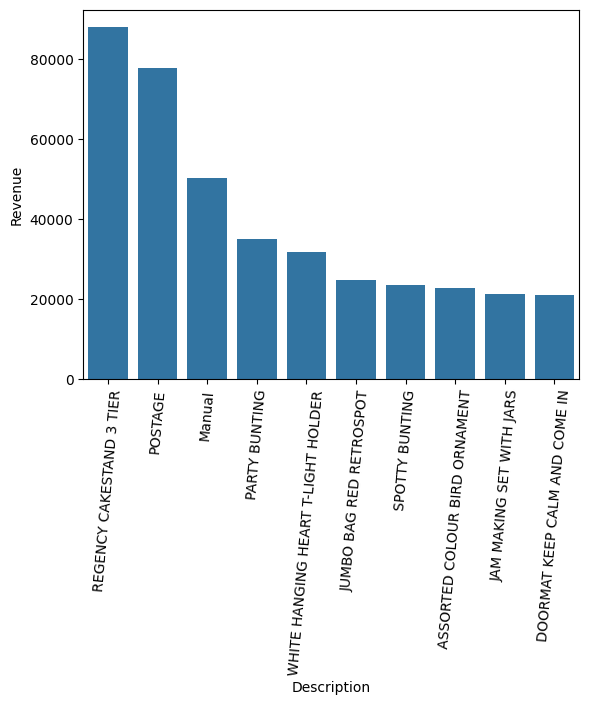

In [ ]:
sns.barplot(data = top10_products, x = top10_products["Description"], y = top10_products["Revenue"])
plt.xticks(rotation = 85)

**Which Month generates more revenue?**

<Axes: xlabel='Month'>

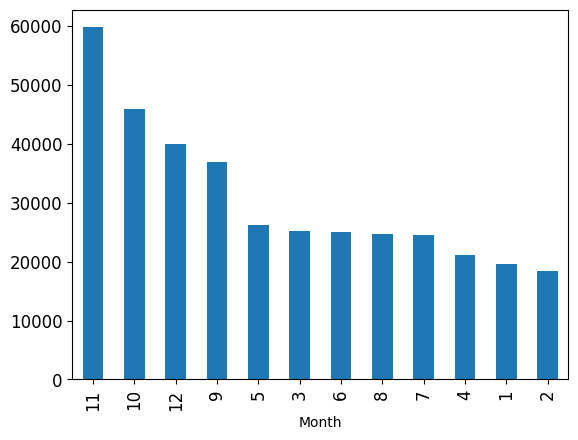

In [ ]:
retail_eda_df.groupby("Month")["Revenue"].count().sort_values(ascending = False).plot.bar(fontsize = 12)

**Which day of the week generates more revenue?**

<Axes: xlabel='Day_of_week'>

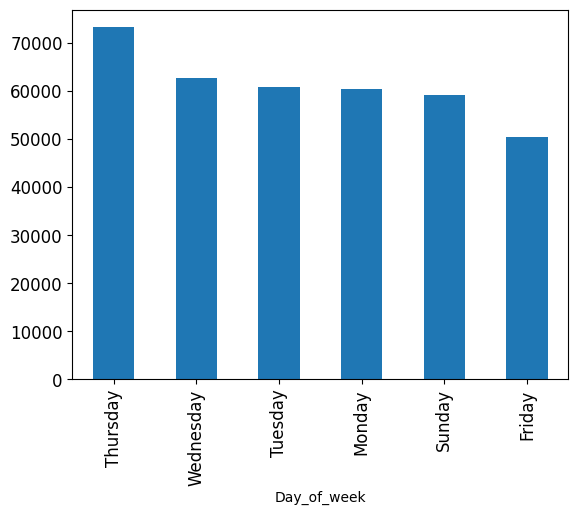

In [ ]:
retail_eda_df.groupby("Day_of_week")["Revenue"].count().sort_values(ascending = False).plot.bar(fontsize = 12)

 Most sales revenues are achieved in UK also most customers are located there.
 Thursdays generate more revenue compared to other days of the week.
 Sales is high in November compared to other months.


We will consider customers from UK and proceed with RFM and Clustering analysis. Similar exercise can be done for customers present in different countries.

In [ ]:
#creating new dataframe which contains only UK customers
retail_uk = retail_eda_df[retail_eda_df['Country']=='United Kingdom']
retail_uk.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Day,Revenue
count,329007.000000,329007,329007.000000,329007.000000,329007.000000,329007.000000,329007.000000,329007.000000
mean,6.768358,2011-07-11 07:19:28.742670848,3.064755,15554.190747,2010.933096,7.636610,15.044577,13.530540
min,1.000000,2010-12-01 08:26:00,0.000000,12747.000000,2010.000000,1.000000,1.000000,0.000000
25%,2.000000,2011-04-07 11:30:00,1.250000,14209.000000,2011.000000,5.000000,7.000000,3.950000
50%,4.000000,2011-07-31 15:00:00,1.950000,15525.000000,2011.000000,9.000000,15.000000,10.080000
75%,12.000000,2011-10-23 13:49:00,3.750000,16931.000000,2011.000000,11.000000,22.000000,17.340000
max,27.000000,2011-12-09 12:49:00,8142.750000,18287.000000,2011.000000,12.000000,31.000000,8142.750000
std,6.575661,NaN,18.492949,1591.923625,0.249857,3.420149,8.685926,24.081996


In [ ]:
print("Number of transactions: ", retail_uk['InvoiceNo'].nunique())
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )

Number of transactions:  15500
Number of products bought:  3628
Number of customers: 3825


We will do RFM Analysis as a first step and then combine RFM with K-means clustering algorithm.


### **RFM Analysis**

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

RECENCY (R): Days since last purchase
FREQUENCY (F): Total number of purchases
MONETARY VALUE (M): Total money spent by customer.
We will create those 3 customer attributes for each customer.

#### **Recency**

To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [ ]:
#last date available in our dataset
retail_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

The last date we have is 2011-12-09 so we will use it as reference.

In [ ]:
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [ ]:
#create a new column called date which contains the date of invoice only
retail_uk['date'] = retail_uk['InvoiceDate'].dt.date

In [ ]:
retail_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Day_of_week,Revenue,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,Wednesday,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,Wednesday,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,Wednesday,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,Wednesday,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,Wednesday,20.34,2010-12-01


In [ ]:
# doing group by customers and checking last date of purshace
recency_df = retail_uk.groupby('CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12747.0,2011-12-07
1,12748.0,2011-12-09
2,12749.0,2011-12-06
3,12820.0,2011-12-06
4,12821.0,2011-05-09


In [ ]:
#calculating recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)

In [ ]:
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12747.0,2011-12-07,2
1,12748.0,2011-12-09,0
2,12749.0,2011-12-06,3
3,12820.0,2011-12-06,3
4,12821.0,2011-05-09,214


In [ ]:
#dropping LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

In [ ]:
recency_df.sort_values(by = "Recency",ascending = False)

,CustomerID,Recency
911,14142.0,373
1625,15165.0,373
2418,16274.0,373
3374,17643.0,373
2630,16583.0,373
...,...,...
3263,17490.0,0
848,14051.0,0
2715,16705.0,0
2663,16626.0,0


#### **Frequency**

Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many unique invoices are registered by the same customer.

In [ ]:
#calculating frequency of purchases
frequency_df = retail_uk.groupby(['CustomerID',"InvoiceNo"], as_index=False)['date'].count()

In [ ]:
frequency_df = frequency_df.groupby('CustomerID')["InvoiceNo"].count().reset_index()
frequency_df.columns = ['CustomerID','Frequency']

In [ ]:
frequency_df.sort_values(by = "Frequency", ascending = False)

,CustomerID,Frequency
1,12748.0,204
3513,17841.0,123
1238,14606.0,93
1730,15311.0,91
180,13089.0,89
...,...,...
2508,16406.0,1
2506,16404.0,1
2505,16403.0,1
2502,16400.0,1


#### **Monetary**

Monetary attribute answers the question: How much money did the customer spent over time?

In [ ]:
monetary_df = retail_uk.groupby(by='CustomerID',as_index=False).agg({'Revenue': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12747.0,3073.41
1,12748.0,25640.52
2,12749.0,4032.98
3,12820.0,923.62
4,12821.0,92.72


In [ ]:
monetary_df.sort_values(by = "Monetary",ascending = False)

,CustomerID,Monetary
879,14096.0,61295.62
180,13089.0,43359.28
3513,17841.0,38793.08
875,14088.0,27597.28
1018,14298.0,27322.08
...,...,...
3074,17212.0,3.95
2742,16738.0,3.75
883,14101.0,2.95
2537,16446.0,2.90


### **Creating RFM Table**

In [ ]:
#combinig recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Recency,Frequency
0,12747.0,2,11
1,12748.0,0,204
2,12749.0,3,5
3,12820.0,3,4
4,12821.0,214,1


In [ ]:
#combining the above dataframe with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#setting CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)

rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747.0,2,11,3073.41
12748.0,0,204,25640.52
12749.0,3,5,4032.98
12820.0,3,4,923.62
12821.0,214,1,92.72


### **Customer segments with RFM Model**

#### **Applying RFM score formula**

The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.


##### **RFM Quartiles**

In [ ]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,241.04
0.50,50.0,2.0,547.60
0.75,144.0,4.0,1290.70


In [ ]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 144.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 4.0},
 'Monetary': {0.25: 241.04, 0.5: 547.6, 0.75: 1290.7}}

#### **Creation of RFM segmentation table**

We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good.

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [ ]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [ ]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12747.0,2,11,3073.41,4,4,4
12748.0,0,204,25640.52,4,4,4
12749.0,3,5,4032.98,4,4,4
12820.0,3,4,923.62,4,3,3
12821.0,214,1,92.72,1,1,1


Now that we have the score of each customer, we can represent our customer segmentation.
First, we need to combine the scores (R_Quartile, F_Quartile,M_Quartile) together.

In [ ]:
#creating a new column for RFM score
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) + rfm_segmentation.F_Quartile.map(str) + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12747.0,2,11,3073.41,4,4,4,444
12748.0,0,204,25640.52,4,4,4,444
12749.0,3,5,4032.98,4,4,4,444
12820.0,3,4,923.62,4,3,3,433
12821.0,214,1,92.72,1,1,1,111


Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most.


In [ ]:
#resetting the index
rfm_segmentation = rfm_segmentation.reset_index()
rfm_segmentation

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,12747.0,2,11,3073.41,4,4,4,444
1,12748.0,0,204,25640.52,4,4,4,444
2,12749.0,3,5,4032.98,4,4,4,444
3,12820.0,3,4,923.62,4,3,3,433
4,12821.0,214,1,92.72,1,1,1,111
...,...,...,...,...,...,...,...,...
3820,18280.0,277,1,180.60,1,1,1,111
3821,18281.0,180,1,80.82,1,1,1,111
3822,18282.0,7,2,164.13,4,2,1,421
3823,18283.0,3,16,2045.53,4,4,4,444


In [ ]:
#creating a single dataframe which has RFM values and Customer Invoices and product details
final_rfm_df = retail_uk.merge(rfm_segmentation,on='CustomerID')
final_rfm_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,...,Day_of_week,Revenue,date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,...,Wednesday,15.30,2010-12-01,372,34,5391.21,1,4,4,144
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,Wednesday,20.34,2010-12-01,372,34,5391.21,1,4,4,144
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,...,Wednesday,22.00,2010-12-01,372,34,5391.21,1,4,4,144
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,Wednesday,20.34,2010-12-01,372,34,5391.21,1,4,4,144
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,Wednesday,20.34,2010-12-01,372,34,5391.21,1,4,4,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329002,581416,22809,SET OF 6 T-LIGHTS SANTA,1,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,2011,12,...,Thursday,2.95,2011-12-08,1,1,104.99,4,1,1,411
329003,581416,22807,SET OF 6 T-LIGHTS TOADSTOOLS,2,2011-12-08 14:58:00,1.25,14569.0,United Kingdom,2011,12,...,Thursday,2.50,2011-12-08,1,1,104.99,4,1,1,411
329004,581416,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-12-08 14:58:00,2.10,14569.0,United Kingdom,2011,12,...,Thursday,2.10,2011-12-08,1,1,104.99,4,1,1,411
329005,581416,22809,SET OF 6 T-LIGHTS SANTA,2,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,2011,12,...,Thursday,5.90,2011-12-08,1,1,104.99,4,1,1,411


In [ ]:
#checking the columns after merging
final_rfm_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month', 'Day',
       'Day_of_week', 'Revenue', 'date', 'Recency', 'Frequency', 'Monetary',
       'R_Quartile', 'F_Quartile', 'M_Quartile', 'RFMScore'],
      dtype='object')

In [ ]:
#Creating 4 dataframes which are our 4 customer segments based on RFM score
best_cust = final_rfm_df[final_rfm_df['RFMScore']=='444']
loyal_cust = final_rfm_df[final_rfm_df['F_Quartile']==4]
big_spend_cust = final_rfm_df[final_rfm_df['M_Quartile']==4]
Less_spending_cust = final_rfm_df[final_rfm_df['RFMScore']=='111']

In [ ]:
#Displaying number of customers in each segment
print("Best Customers: ",best_cust["CustomerID"].nunique())
print('Loyal Customers: ',loyal_cust["CustomerID"].nunique())
print("Big Spenders: ",big_spend_cust["CustomerID"].nunique())
print('Low cost Customers: ',Less_spending_cust["CustomerID"].nunique())

Best Customers:  441
Loyal Customers:  954
Big Spenders:  956
Low cost Customers:  371


In [ ]:
best_cust.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Day,Revenue,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
count,138216.000000,138216,138216.000000,138216.000000,138216.000000,138216.000000,138216.000000,138216.000000,138216.000000,138216.000000,138216.000000,138216.0,138216.0,138216.0
mean,6.666370,2011-07-15 16:01:59.664438528,3.037403,15470.770873,2010.935955,7.744161,15.082234,13.874527,5.703283,31.023811,10685.299597,4.0,4.0,4.0
min,1.000000,2010-12-01 09:37:00,0.000000,12747.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,5.000000,1293.350000,4.0,4.0,4.0
25%,2.000000,2011-04-12 16:19:00,1.250000,14096.000000,2011.000000,5.000000,7.000000,3.750000,1.000000,9.000000,2851.810000,4.0,4.0,4.0
50%,4.000000,2011-08-07 14:34:00,1.950000,15214.000000,2011.000000,9.000000,15.000000,9.900000,4.000000,15.000000,4910.920000,4.0,4.0,4.0
75%,10.000000,2011-10-27 16:41:00,3.750000,16987.000000,2011.000000,11.000000,23.000000,17.340000,9.000000,26.000000,9754.050000,4.0,4.0,4.0
max,27.000000,2011-12-09 12:49:00,3155.950000,18283.000000,2011.000000,12.000000,31.000000,3155.950000,17.000000,204.000000,61295.620000,4.0,4.0,4.0
std,6.573161,NaN,13.668305,1676.666996,0.244833,3.434512,8.747142,21.733828,4.958785,43.029462,14078.413152,0.0,0.0,0.0


In [ ]:
loyal_cust.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Day,Revenue,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
count,209665.000000,209665,209665.000000,209665.000000,209665.000000,209665.000000,209665.000000,209665.000000,209665.000000,209665.000000,209665.000000,209665.000000,209665.0,209665.000000
mean,6.822822,2011-07-06 07:52:36.364867584,3.071383,15546.634140,2010.931472,7.494975,14.985734,13.976286,18.835132,23.382868,7956.629326,3.600515,4.0,3.914306
min,1.000000,2010-12-01 08:26:00,0.000000,12747.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,5.000000,70.020000,1.000000,4.0,1.000000
25%,2.000000,2011-04-03 11:36:00,1.250000,14189.000000,2011.000000,5.000000,7.000000,4.150000,2.000000,7.000000,2107.410000,3.000000,4.0,4.000000
50%,4.000000,2011-07-21 10:10:00,1.950000,15453.000000,2011.000000,8.000000,14.000000,10.000000,9.000000,11.000000,3583.210000,4.000000,4.0,4.000000
75%,11.000000,2011-10-17 16:53:00,3.750000,16985.000000,2011.000000,11.000000,22.000000,17.400000,22.000000,19.000000,6974.820000,4.000000,4.0,4.000000
max,27.000000,2011-12-09 12:49:00,8142.750000,18283.000000,2011.000000,12.000000,31.000000,8142.750000,372.000000,204.000000,61295.620000,4.000000,4.0,4.000000
std,6.599865,NaN,21.824417,1623.404834,0.252651,3.439651,8.663367,27.410388,32.349111,36.611742,12090.096081,0.679162,0.0,0.293146


In [ ]:
big_spend_cust.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Day,Revenue,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
count,219066.000000,219066,219066.000000,219066.000000,219066.000000,219066.000000,219066.000000,219066.000000,219066.000000,219066.000000,219066.000000,219066.000000,219066.000000,219066.0
mean,7.034697,2011-07-07 05:41:28.503738624,3.106196,15506.728621,2010.935344,7.479002,14.969735,14.409048,22.044110,22.313102,7799.750735,3.528681,3.861352,4.0
min,1.000000,2010-12-01 08:26:00,0.000000,12747.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1293.350000,1.000000,1.000000,4.0
25%,2.000000,2011-04-04 13:33:30,1.250000,14135.000000,2011.000000,5.000000,7.000000,4.250000,3.000000,6.000000,2193.640000,3.000000,4.000000,4.0
50%,4.000000,2011-07-22 14:07:00,1.950000,15392.000000,2011.000000,8.000000,15.000000,10.200000,9.000000,10.000000,3501.330000,4.000000,4.000000,4.0
75%,12.000000,2011-10-17 14:23:00,3.750000,16938.000000,2011.000000,11.000000,22.000000,17.700000,26.000000,18.000000,6594.430000,4.000000,4.000000,4.0
max,27.000000,2011-12-09 12:49:00,8142.750000,18283.000000,2011.000000,12.000000,31.000000,8142.750000,372.000000,204.000000,61295.620000,4.000000,4.000000,4.0
std,6.623540,NaN,22.220635,1621.783856,0.245919,3.423551,8.673188,27.658151,36.461114,36.148639,11841.644400,0.747593,0.395833,0.0


In [ ]:
Less_spending_cust.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Day,Revenue,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
count,4531.000000,4531,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.0,4531.000000,4531.0,4531.0,4531.0
mean,5.336350,2011-03-20 14:15:59.894063360,3.149153,15851.239682,2010.817038,5.349371,14.458618,10.636186,263.963805,1.0,158.227405,1.0,1.0,1.0
min,1.000000,2010-12-01 10:37:00,0.080000,12821.000000,2010.000000,1.000000,1.000000,0.190000,145.000000,1.0,2.900000,1.0,1.0,1.0
25%,1.000000,2011-01-23 12:41:00,1.250000,14466.500000,2011.000000,3.000000,7.000000,2.950000,201.000000,1.0,119.930000,1.0,1.0,1.0
50%,2.000000,2011-03-20 12:50:00,1.950000,15723.000000,2011.000000,4.000000,14.000000,7.500000,264.000000,1.0,157.920000,1.0,1.0,1.0
75%,8.000000,2011-05-22 15:00:00,3.750000,17455.000000,2011.000000,6.000000,22.000000,15.000000,320.000000,1.0,204.500000,1.0,1.0,1.0
max,27.000000,2011-07-17 15:59:00,165.000000,18281.000000,2011.000000,12.000000,31.000000,197.100000,373.000000,1.0,240.890000,1.0,1.0,1.0
std,5.951522,NaN,4.137731,1620.495987,0.386678,3.572397,8.532641,12.805882,69.674614,0.0,52.004609,0.0,0.0,0.0


### **Applying K-means clustering on RFM variables**

In [ ]:
#dropping columns which are not important for K-means
rfm_data = rfm_df.drop(['R_Quartile','F_Quartile','M_Quartile','RFMScore'],axis=1)
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747.0,2,11,3073.41
12748.0,0,204,25640.52
12749.0,3,5,4032.98
12820.0,3,4,923.62
12821.0,214,1,92.72


#### **Feature correlations**

In [ ]:
#checking correlation
rfm_data.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.274516,-0.255733
Frequency,-0.274516,1.000000,0.728707
Monetary,-0.255733,0.728707,1.000000


<Axes: >

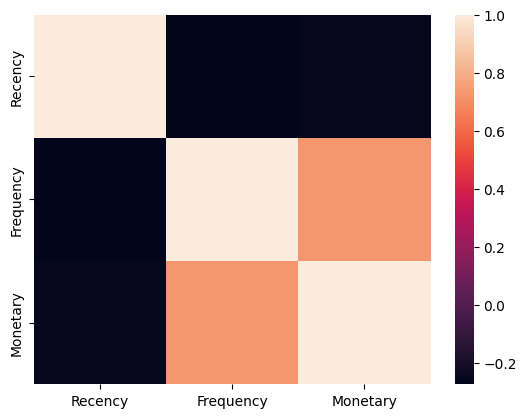

In [ ]:
sns.heatmap(rfm_data.corr())

Frequency and Monetary are positively correlated.

#### **Visualize feature distributions**
To get a better understanding of the dataset, we can construct a scatter matrix of each of the three features present in the RFM data.

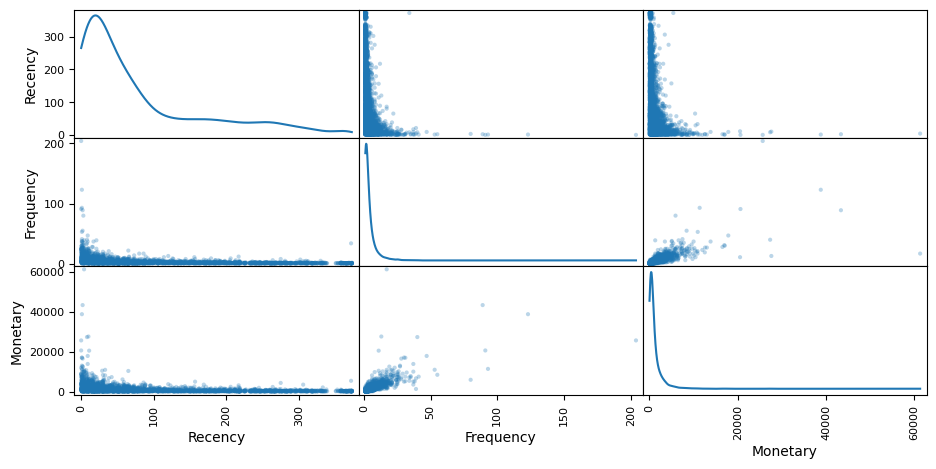

In [ ]:
# Produce a scatter matrix for each pair of features in the data
scatter_matrix(rfm_data, alpha = 0.3, figsize = (11,5), diagonal = 'kde');

We can see a skewed distribution of the 3 variables and there are outliers.

This indicates why normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

#### **Data Normalization**

In [ ]:
#Normalizing data by performing log transformation
rfm_r_log = np.log(rfm_data['Recency']+0.1) #can't take log(0) and so add a small number
rfm_f_log = np.log(rfm_data['Frequency'])
rfm_m_log = np.log(rfm_data['Monetary']+0.1)

In [ ]:
log_data = pd.DataFrame({'Monetary': rfm_m_log,'Recency': rfm_r_log,'Frequency': rfm_f_log})

In [ ]:
log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12747.0,8.030576,0.741937,2.397895
12748.0,10.151933,-2.302585,5.318120
12749.0,8.302286,1.131402,1.609438
12820.0,6.828409,1.131402,1.386294
12821.0,4.530662,5.366443,0.000000


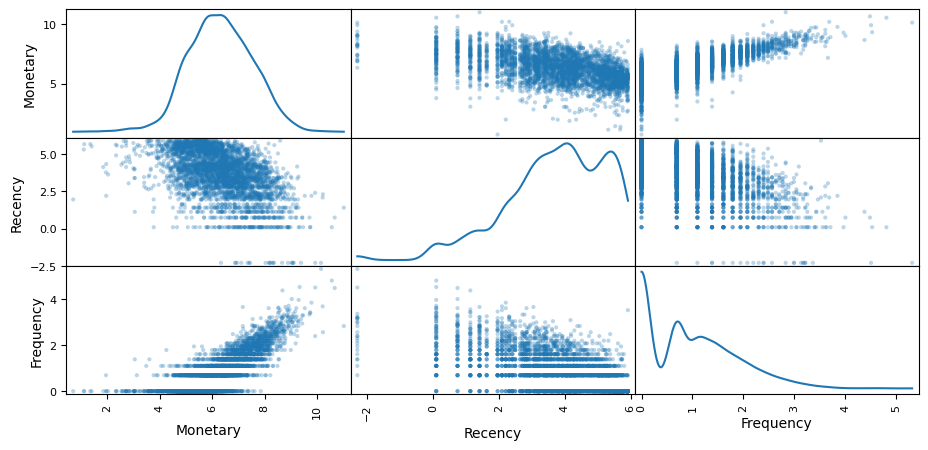

In [ ]:
# Produce a scatter matrix for each pair of features in the data
scatter_matrix(log_data, alpha = 0.3, figsize = (11,5), diagonal = 'kde');

The distributions of Frequency and Monetary are better, more normalized, but it's not the case with Recency Distribution, which is improved but not as much.

In [ ]:
log_data.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.479099,0.805641
Recency,-0.479099,1.000000,-0.570631
Frequency,0.805641,-0.570631,1.000000


<Axes: >

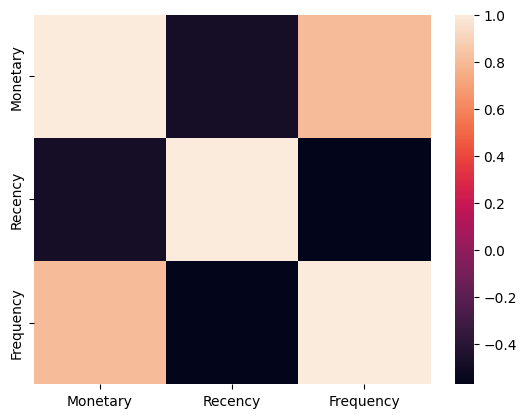

In [ ]:
sns.heatmap(log_data.corr())

Now, Monetary and Frequency are more strongly correlated.

K-means Implementation :
A common challenge with k-means is that we need to know number of cluster before modelling. Figuring out how many clusters we need is not obvious from data, thus we will use Elbow curve method.

We will use RFMScore which is a derived variable and it indicates the purchasing behaviour of customers

In [ ]:
X= rfm_segmentation[["RFMScore"]]

#### **ELBOW curve**

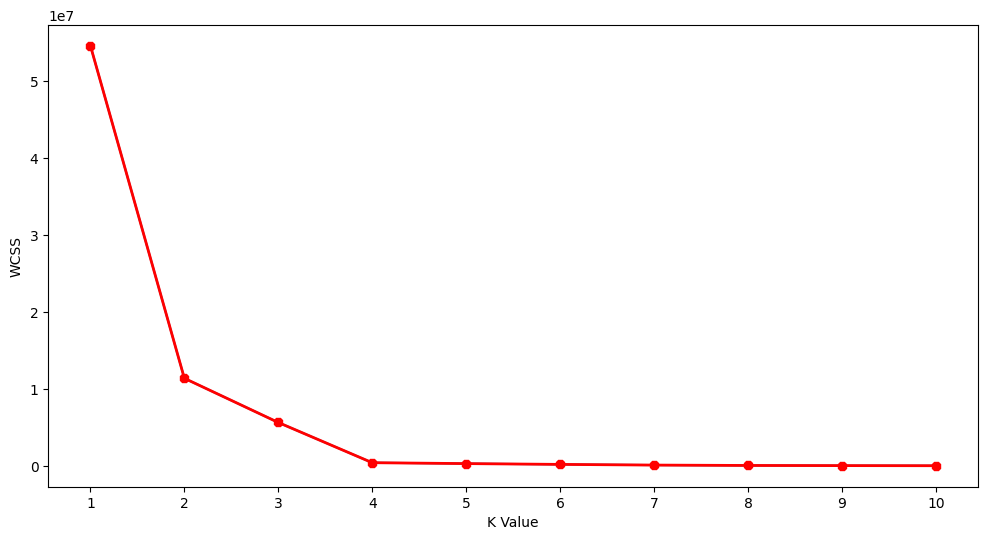

In [ ]:
#Performing Elbow curve method to identify the number of clusters
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

#### **Implementing K-means**

In [ ]:
#Taking 4 clusters
km1=KMeans(n_clusters=4)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
log_data["label"] = y
#The new dataframe with the clustering done
log_data.head()

,Monetary,Recency,Frequency,label
CustomerID,,,,
12747.0,8.030576,0.741937,2.397895,2
12748.0,10.151933,-2.302585,5.318120,2
12749.0,8.302286,1.131402,1.609438,2
12820.0,6.828409,1.131402,1.386294,2
12821.0,4.530662,5.366443,0.000000,1


#### **K-means results visualization**

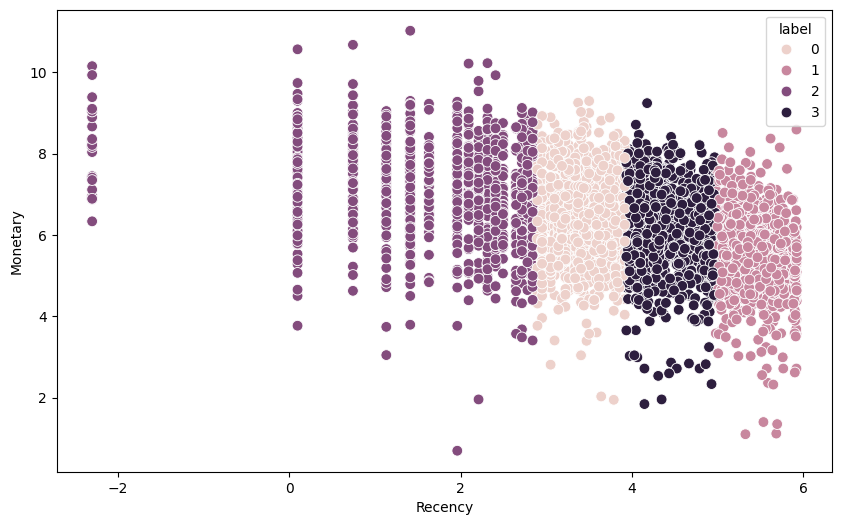

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = "Recency", y = "Monetary", hue ="label", legend='full',data = log_data ,s = 60 )

plt.show()

#### **K-means results analysis to create personas**

In [ ]:
log_data["label"].value_counts()

label
2    972
0    954
1    952
3    947
Name: count, dtype: int64

In [ ]:
log_data = log_data.reset_index()
log_data

,CustomerID,Monetary,Recency,Frequency,label
0,12747.0,8.030576,0.741937,2.397895,2
1,12748.0,10.151933,-2.302585,5.318120,2
2,12749.0,8.302286,1.131402,1.609438,2
3,12820.0,6.828409,1.131402,1.386294,2
4,12821.0,4.530662,5.366443,0.000000,1
...,...,...,...,...,...
3820,18280.0,5.196838,5.624378,0.000000,1
3821,18281.0,4.393461,5.193512,0.000000,1
3822,18282.0,5.101268,1.960095,0.693147,2
3823,18283.0,7.623461,1.131402,2.772589,2


In [ ]:
final_cluster_df = retail_uk.merge(log_data,on='CustomerID')

In [ ]:
final_cluster_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Day_of_week,Revenue,date,Monetary,Recency,Frequency,label
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,Wednesday,15.30,2010-12-01,8.592544,5.919163,3.526361,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,Wednesday,20.34,2010-12-01,8.592544,5.919163,3.526361,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,Wednesday,22.00,2010-12-01,8.592544,5.919163,3.526361,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,Wednesday,20.34,2010-12-01,8.592544,5.919163,3.526361,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,Wednesday,20.34,2010-12-01,8.592544,5.919163,3.526361,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329002,581416,22809,SET OF 6 T-LIGHTS SANTA,1,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,2011,12,8,Thursday,2.95,2011-12-08,4.654817,0.095310,0.000000,2
329003,581416,22807,SET OF 6 T-LIGHTS TOADSTOOLS,2,2011-12-08 14:58:00,1.25,14569.0,United Kingdom,2011,12,8,Thursday,2.50,2011-12-08,4.654817,0.095310,0.000000,2
329004,581416,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-12-08 14:58:00,2.10,14569.0,United Kingdom,2011,12,8,Thursday,2.10,2011-12-08,4.654817,0.095310,0.000000,2
329005,581416,22809,SET OF 6 T-LIGHTS SANTA,2,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,2011,12,8,Thursday,5.90,2011-12-08,4.654817,0.095310,0.000000,2


In [ ]:
final_cluster_df.groupby("label")["Revenue"].sum().reset_index()

,label,Revenue
0,0,1062498.831
1,1,367520.881
2,2,2303282.740
3,3,718339.882


In [ ]:
final_cluster_df.groupby("label")["InvoiceNo"].count().reset_index()

,label,InvoiceNo
0,0,81992
1,1,27228
2,2,172533
3,3,47254


In [ ]:
final_cluster_df.groupby("label")["InvoiceDate"].max().reset_index()

,label,InvoiceDate
0,0,2011-11-21 17:33:00
1,1,2011-07-17 15:59:00
2,2,2011-12-09 12:49:00
3,3,2011-10-19 16:16:00


We have created 4 customer segments based on the results from K-means clusters and RFM analysis.

## **Conclusion**
### **Strategies for the four customer segments**
##### **Best Customers:** ( Cluster 2 )
Offer exclusive VIP memberships with perks like early access to sales, special discounts, or free shipping.

##### **Loyal Customers:** ( Cluster 0 )
Reward their loyalty with points-based systems or tiered rewards programs to incentivize continued purchases.
Encourage them to refer friends or family with referral bonuses or discounts.

#### **Big Spenders:** ( Cluster 3 )
Provide flexible payment options or financing plans for larger purchases.

#### **Low cost Customers:** ( Cluster 1 )
Offer budget-friendly products or value bundles to attract price-conscious customers